In [161]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image 
import random
import matplotlib
matplotlib.style.use('ggplot')

from sklearn.metrics import confusion_matrix
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/higgsboson/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [162]:
train_df = pd.read_csv('Corona_train.csv')
train_df.head()

,ID,Sentiment,CoronaTweet
0,22979,Positive,I see all kinds of academics already whipping ...
1,9880,Negative,@HenrySmithUK can you raise with Boris please ...
2,35761,Negative,It s a confusing odd time for the shopping pub...
3,37968,Positive,Blog Summary: The Impact of COVID-19 on the Ca...
4,19709,Neutral,??????? ??????? ???\r\r\nWaiting in a long Que...


In [163]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

sentences = train_df_positive['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [164]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [165]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [166]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log((len(train_df_positive) + 2))
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log((len(train_df_negative) + 2))
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log((len(train_df_neutral) + 2))  
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive) / len(train_df))
y_is_negative = np.log(len(train_df_negative) / len(train_df))
y_is_neutral = np.log(len(train_df_neutral) / len(train_df))

In [167]:
validate_df = pd.read_csv('Corona_validation.csv')
validate_df.head()

,ID,Sentiment,CoronaTweet
0,7184,Negative,I reflected on my own consumer behaviour last ...
1,36363,Negative,I know everyone is getting stir crazy but befo...
2,10423,Negative,I haven t seen gas prices this low since I fir...
3,6409,Neutral,Only batmeat left on the supermarket shelves\r...
4,7015,Neutral,"Along with health workers, we need to apprecia..."


In [168]:
predictions = []
actual = []
for id, row in validate_df.iterrows():
    
    words = row['CoronaTweet'].split()
    words = np.unique(words)
    
    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    for word in words:
        # 0.5 due to laplace smoothing
        positive_sum += positive_prob.get(word, np.log(0.5))
        negative_sum += negative_prob.get(word, np.log(0.5))
        neutral_sum += neutral_prob.get(word, np.log(0.5))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')    
    
    actual.append(row['Sentiment'])


In [169]:
# actual = validate_df['Sentiment'].values
# len(actual)

In [170]:
# actual = validate_df['Sentiment'].values


corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.35226237473428484


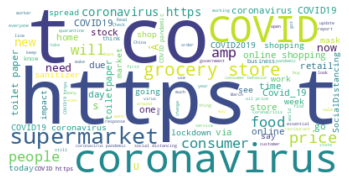

In [171]:
stopwords = set(STOPWORDS)

neutral_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_neutral['CoronaTweet'].tolist())

neutral_cloud.generate(entire_text)

plt.imshow(neutral_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

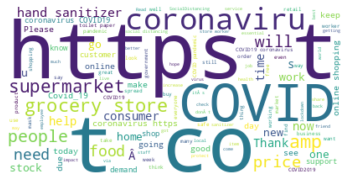

In [172]:
stopwords = set(STOPWORDS)

positive_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_positive['CoronaTweet'].tolist())

positive_cloud.generate(entire_text)

plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

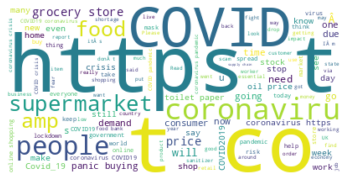

In [173]:
stopwords = set(STOPWORDS)

negative_cloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

entire_text = ' '.join(train_df_negative['CoronaTweet'].tolist())

negative_cloud.generate(entire_text)

plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Part b:

In [174]:
options = ["Neutral", "Positive","Negative"]
random_prediction = [random.choice(options) for _ in range(len(actual))]
corrrect = 0
for ac, pred in zip(actual, random_prediction):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.3200728818706347


In [175]:
all_positive = ["Positive" for _ in range(len(actual))]
corrrect = 0
for ac, pred in zip(actual, all_positive):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.4385059216519891


Part c


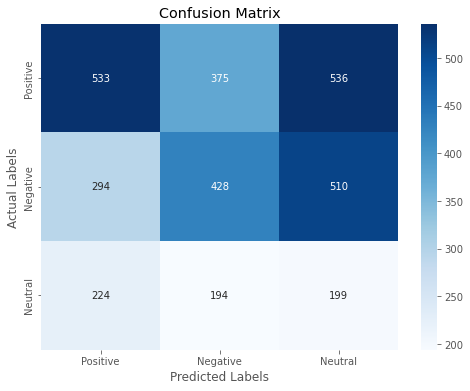

In [176]:
confusion_mat = confusion_matrix(actual, predictions, labels=['Positive', 'Negative', 'Neutral'])

# Display the confusion matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()

In [177]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

sentences = train_df_positive['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [178]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [179]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [180]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log((len(train_df_positive) + 2))
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log((len(train_df_negative) + 2))
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log((len(train_df_neutral) + 2))  
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive) / len(train_df))
y_is_negative = np.log(len(train_df_negative) / len(train_df))
y_is_neutral = np.log(len(train_df_neutral) / len(train_df))

In [181]:
predictions = []
actual = []
for id, row in validate_df.iterrows():
    
    words = row['CoronaTweet'].split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    for word in words:
        # 0.5 due to laplace smoothing
        positive_sum += positive_prob.get(word, np.log(0.5))
        negative_sum += negative_prob.get(word, np.log(0.5))
        neutral_sum += neutral_prob.get(word, np.log(0.5))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')    
    
    actual.append(row['Sentiment'])


In [182]:
corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.3938657758882478


In [183]:
train_df_positive = train_df[train_df['Sentiment'] == 'Positive']
positive_wc = {}

sentences = train_df_positive['CoronaTweet']

for sentence in sentences:
    word_raw = sentence.split()
    words = np.unique(word_raw)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    if len(word_raw) > 1:
        for i in range(len(word_raw) - 1):
            if word_raw[i] in filtered_words and word_raw[i+1] in filtered_words:
                bigram = stemmer.stem(word_raw[i]) + '  ' +stemmer.stem( word_raw[i+1])
                if bigram not in positive_wc:
                    positive_wc[bigram] = 0
                positive_wc[bigram] += 1  
                
                
    for word in words:
        if word not in positive_wc:
            positive_wc[word] = 0
        positive_wc[word] += 1  

In [184]:
train_df_negative = train_df[train_df['Sentiment'] == 'Negative']
negative_wc = {}

sentences = train_df_negative['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    if len(word_raw) > 1:
        for i in range(len(word_raw) - 1):
            if word_raw[i] in filtered_words and word_raw[i+1] in filtered_words:
                bigram = stemmer.stem(word_raw[i]) + '  ' +stemmer.stem( word_raw[i+1])
                if bigram not in positive_wc:
                    positive_wc[bigram] = 0
                positive_wc[bigram] += 1  
    
    for word in words:
        if word not in negative_wc:
            negative_wc[word] = 0
        negative_wc[word] += 1  

In [185]:
train_df_neutral = train_df[train_df['Sentiment'] == 'Neutral']
neutral_wc = {}

sentences = train_df_neutral['CoronaTweet']

for sentence in sentences:
    words = sentence.split()
    words = np.unique(words)
    
    filtered_words = [word for word in words if word not in stopwords]
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    
    
    if len(word_raw) > 1:
        for i in range(len(word_raw) - 1):
            if word_raw[i] in filtered_words and word_raw[i+1] in filtered_words:
                bigram = stemmer.stem(word_raw[i]) + '  ' +stemmer.stem( word_raw[i+1])
                if bigram not in positive_wc:
                    positive_wc[bigram] = 0
                positive_wc[bigram] += 1  
    
    for word in words:
        if word not in neutral_wc:
            neutral_wc[word] = 0
        neutral_wc[word] += 1  

In [190]:
positive_prob = {}

for word, count in positive_wc.items():
    positive_prob[word] = np.log((count + 1)) - np.log((len(train_df_positive) + 2))
    
negative_prob = {}

for word, count in negative_wc.items():
    negative_prob[word] = np.log((count + 1)) - np.log((len(train_df_negative) + 2))
    
neutral_prob = {}

for word, count in neutral_wc.items():
    neutral_prob[word] = np.log((count + 1)) - np.log((len(train_df_neutral) + 2))  
    
# Prior Probabilities, for them laplace smoothing is not that useful
y_is_positive = np.log(len(train_df_positive) / len(train_df))
y_is_negative = np.log(len(train_df_negative) / len(train_df))
y_is_neutral = np.log(len(train_df_neutral) / len(train_df))

In [191]:
predictions = []
actual = []

for id, row in validate_df.iterrows():
    word_raw = row['CoronaTweet'].split()
    words = np.unique(word_raw)
    
    filtered_words = [word for word in words if word not in stopwords]

    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in filtered_words]
    

    positive_sum = y_is_positive
    negative_sum = y_is_negative
    neutral_sum = y_is_neutral
    
    if len(word_raw) > 1:
        for i in range(len(word_raw) - 1):
            if word_raw[i] in filtered_words and word_raw[i+1] in filtered_words:
                bigram = stemmer.stem(word_raw[i]) + '  ' +stemmer.stem( word_raw[i+1])
                # print(bigram)
                positive_sum += positive_prob.get(bigram, np.log(0.5))
                negative_sum += negative_prob.get(bigram, np.log(0.5))
                neutral_sum += neutral_prob.get(bigram, np.log(0.5))
    
    for word in words:
        # 0.5 due to laplace smoothing
        positive_sum += positive_prob.get(word, np.log(0.5))
        negative_sum += negative_prob.get(word, np.log(0.5))
        neutral_sum += neutral_prob.get(word, np.log(0.5))
    
    if positive_sum >= negative_sum and positive_sum >= neutral_sum:
        predictions.append('Positive')
    elif negative_sum >= positive_sum and negative_sum >= neutral_sum:
        predictions.append('Negative')
    elif neutral_sum >= positive_sum and neutral_sum >= negative_sum:
        predictions.append('Neutral')    
    
    actual.append(row['Sentiment'])


In [193]:
corrrect = 0
for ac, pred in zip(actual, predictions):
    if ac == pred:
        corrrect += 1
        
print(corrrect / len(actual))

0.2860613422411175
